In [1]:
from genographs.heatmap.runSignal import *
from genographs.heatmap.plotHeatmaps import *
from genographs.heatmap.plotProfiles import *

%load_ext rpy2.ipython


Please run `data/getData.sh` script to fetch some example data from ENCODE.

In [2]:
#!bash data/getData.sh

An example BED file with GR and random sets. 

In [3]:
BED = pd.read_table("data/ALL.hg38.bed", names=["Chr", "Start","End","Set"])

In [4]:
BWS = [
    "data/ENCFF331JNU.bigWig",
    "data/ENCFF809IAK.bigWig"
]

In [5]:

Nbins=200
h=1000

runSignal(BED, BWS, "Example.p", ref="hg38",  Nbins=Nbins, h=h, nP=20)

hg38
0: ENCFF331JNU.bigWig
1: ENCFF331JNU.bigWig
2: ENCFF331JNU.bigWig
3: ENCFF331JNU.bigWig
4: ENCFF331JNU.bigWig
5: ENCFF331JNU.bigWig
6: ENCFF331JNU.bigWig
7: ENCFF331JNU.bigWig
8: ENCFF331JNU.bigWig
9: ENCFF331JNU.bigWig
10: ENCFF331JNU.bigWig
11: ENCFF331JNU.bigWig
12: ENCFF331JNU.bigWig
13: ENCFF331JNU.bigWig
14: ENCFF331JNU.bigWig
15: ENCFF331JNU.bigWig
16: ENCFF331JNU.bigWig
17: ENCFF331JNU.bigWig
18: ENCFF331JNU.bigWig
19: ENCFF331JNU.bigWig
4: ENCFF809IAK.bigWig
11: ENCFF809IAK.bigWig
15: ENCFF809IAK.bigWig
0: ENCFF809IAK.bigWig
2: ENCFF809IAK.bigWig
13: ENCFF809IAK.bigWig
12: ENCFF809IAK.bigWig
18: ENCFF809IAK.bigWig
7: ENCFF809IAK.bigWig
1: ENCFF809IAK.bigWig
6: ENCFF809IAK.bigWig
14: ENCFF809IAK.bigWig
5: ENCFF809IAK.bigWig
9: ENCFF809IAK.bigWig
17: ENCFF809IAK.bigWig
8: ENCFF809IAK.bigWig
3: ENCFF809IAK.bigWig
10: ENCFF809IAK.bigWig
16: ENCFF809IAK.bigWig
19: ENCFF809IAK.bigWig
Writing...


In [6]:
S = pickle.load(open("Example.p","rb"))

S = np.nan_to_num(S)
Amean = S.mean(2)

%Rpush Amean


R = %R library(edgeR); NormFactor <- calcNormFactors(object = Amean, method = "TMM"); LibSize <- colSums(Amean); SizeFactors <- NormFactor * LibSize / 1000000; SizeFactors.Reciprocal <- 1/SizeFactors

N = S * R[:,None]

R[write to console]: Loading required package: limma



In [7]:

samples = [
    "GR-ChIPseq.0h-DEX",
    "GR-ChIPseq.4h-DEX",
]
palette = ["Reds", "Reds"]





sets = ["GR","rnd"]

colorPalette = {
    "rnd"     : "#545c5e",
    "GR"  : "#FF7247"
}

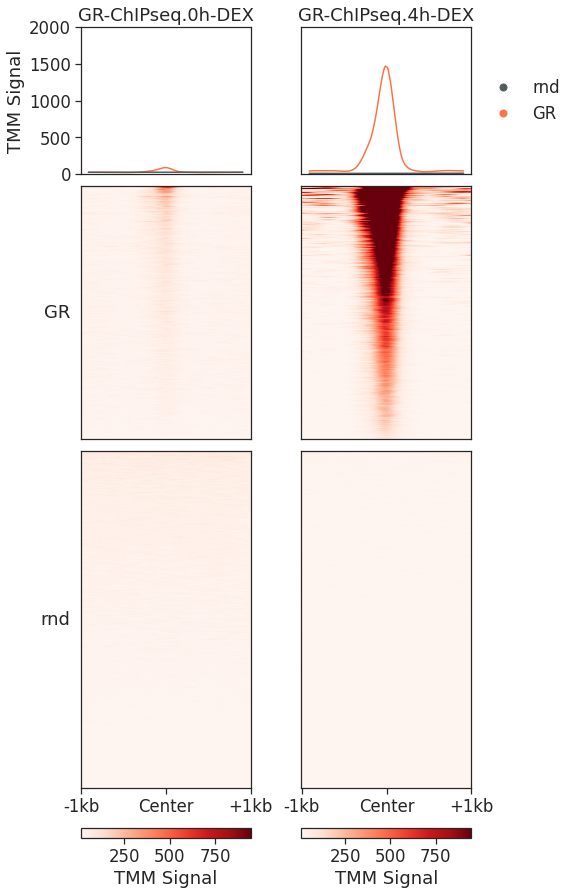

In [8]:


vmax = 2*(N.max() ** 0.6)
vmin = 10

fig = plotHeatmaps(
    N, BED,
    samples, palette, sets, colorPalette,
    ylim=2000,vmin=vmin,vmax=vmax,
    h=1000, clab="TMM Signal"
)

# PhastCons

In [9]:

BED = pd.read_table("data/ALL.hg19.bed", names=["Chr", "Start","End","Set"])

BWS = [
    "data/hg19.100way.phastCons.bw"
]

In [10]:

Nbins=200
h=1000

runSignal(BED, BWS, "Example.PhastCons.p", ref="hg19",  Nbins=Nbins, h=h, nP=20)

hg19
0: hg19.100way.phastCons.bw
1: hg19.100way.phastCons.bw
2: hg19.100way.phastCons.bw
3: hg19.100way.phastCons.bw
4: hg19.100way.phastCons.bw
5: hg19.100way.phastCons.bw
6: hg19.100way.phastCons.bw
7: hg19.100way.phastCons.bw
8: hg19.100way.phastCons.bw
9: hg19.100way.phastCons.bw
10: hg19.100way.phastCons.bw
11: hg19.100way.phastCons.bw
12: hg19.100way.phastCons.bw
13: hg19.100way.phastCons.bw
14: hg19.100way.phastCons.bw
15: hg19.100way.phastCons.bw
16: hg19.100way.phastCons.bw
17: hg19.100way.phastCons.bw
18: hg19.100way.phastCons.bw
19: hg19.100way.phastCons.bw
Writing...


In [11]:
S = pickle.load(open("Example.PhastCons.p","rb"))

S = np.nan_to_num(S)
Amean = S.mean(2)

%Rpush Amean


R = %R library(edgeR); NormFactor <- calcNormFactors(object = Amean, method = "TMM"); LibSize <- colSums(Amean); SizeFactors <- NormFactor * LibSize / 1000000; SizeFactors.Reciprocal <- 1/SizeFactors

N = S * R[:,None]

In [12]:


sets = ["GR","rnd"]

colorPalette = {
    "rnd"     : "#545c5e",
    "GR"  : "#FF7247"
}

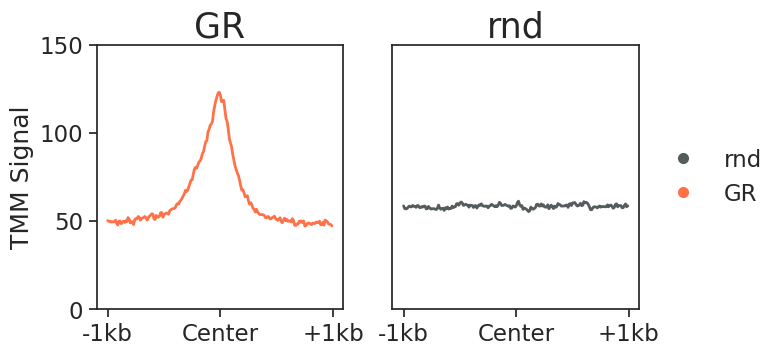

In [13]:

fig = plotProfiles(
    N, BED,
    sets,colorPalette,
    nrows=1,ncols=2,
    h=1000,
    ylim=150,
    dpi=100
)
